# Practice: Produce the best Cross-Validated SVM using the Glass Dataset 

In [24]:
# Import the following:
# numpy
# pandas
# the proper SVM class
# grid search cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [25]:
glass = pd.read_csv('data/glass.csv')
xvars = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
X = glass[xvars]
#y = (glass['Type'] > 4).astype('int')
y = glass['Type']

In [26]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [27]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [28]:
# 20 equally distant numbers between 1 and 3
np.linspace(1, 3, 20)

array([1.        , 1.10526316, 1.21052632, 1.31578947, 1.42105263,
       1.52631579, 1.63157895, 1.73684211, 1.84210526, 1.94736842,
       2.05263158, 2.15789474, 2.26315789, 2.36842105, 2.47368421,
       2.57894737, 2.68421053, 2.78947368, 2.89473684, 3.        ])

In [30]:
np.logspace(-4, 1, 30)

array([1.00000000e-04, 1.48735211e-04, 2.21221629e-04, 3.29034456e-04,
       4.89390092e-04, 7.27895384e-04, 1.08263673e-03, 1.61026203e-03,
       2.39502662e-03, 3.56224789e-03, 5.29831691e-03, 7.88046282e-03,
       1.17210230e-02, 1.74332882e-02, 2.59294380e-02, 3.85662042e-02,
       5.73615251e-02, 8.53167852e-02, 1.26896100e-01, 1.88739182e-01,
       2.80721620e-01, 4.17531894e-01, 6.21016942e-01, 9.23670857e-01,
       1.37382380e+00, 2.04335972e+00, 3.03919538e+00, 4.52035366e+00,
       6.72335754e+00, 1.00000000e+01])

In [84]:
pgrid ={
    'kernel': ['rbf'], 
    'C': np.logspace(0, 2, 50)}


In [85]:
#totally blank SVM
svmModel = SVC()

In [86]:
gcv = GridSearchCV(svmModel, pgrid, cv=5, return_train_score=False)

In [87]:
gcv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': array([  1.     ,   1.09854,   1.20679,   1.32571,   1.45635,   1.59986,
         1.75751,   1.9307 ,   2.12095,   2.32995,   2.55955,   2.81177,
         3.08884,   3.39322,   3.72759,   4.09492,   4.49843,   4.94171,
         5.42868,   5.96362,   6.55129,   7.1...     51.79475,  56.89866,  62.50552,  68.66488,  75.4312 ,  82.86428,
        91.02982, 100.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=None, verbose=0)

In [88]:
grid_df = pd.DataFrame(gcv.cv_results_)

In [89]:
def plot_params(kernel): 
    accuracy_df = grid_df.loc[grid_df['param_kernel'] == kernel, ['param_C', 'mean_test_score']] 
    accuracy_df.plot(kind='line', x="param_C", y='mean_test_score')

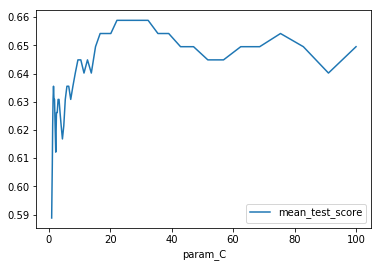

In [90]:
plot_params('rbf')

In [91]:
grid_df.sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
37,0.001982,0.000313,0.000340,0.000016,32.3746,rbf,"{'C': 32.374575428176435, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.690476,0.750,0.658879,0.066207,1
33,0.001880,0.000108,0.000360,0.000011,22.23,rbf,"{'C': 22.229964825261945, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.666667,0.775,0.658879,0.071887,1
34,0.001909,0.000102,0.000342,0.000012,24.4205,rbf,"{'C': 24.42053094548651, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.666667,0.775,0.658879,0.071887,1
35,0.001878,0.000044,0.000349,0.000013,26.827,rbf,"{'C': 26.826957952797247, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.690476,0.750,0.658879,0.066207,1
36,0.001830,0.000110,0.000342,0.000024,29.4705,rbf,"{'C': 29.4705170255181, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.690476,0.750,0.658879,0.066207,1
38,0.001999,0.000160,0.000352,0.000014,35.5648,rbf,"{'C': 35.564803062231285, 'kernel': 'rbf'}",0.577778,0.590909,0.697674,0.666667,0.750,0.654206,0.064633,6
46,0.002601,0.000350,0.000519,0.000100,75.4312,rbf,"{'C': 75.43120063354615, 'kernel': 'rbf'}",0.577778,0.613636,0.674419,0.666667,0.750,0.654206,0.058262,6
30,0.002113,0.000255,0.000385,0.000019,16.7683,rbf,"{'C': 16.768329368110074, 'kernel': 'rbf'}",0.577778,0.590909,0.674419,0.666667,0.775,0.654206,0.069943,6
31,0.001945,0.000062,0.000385,0.000046,18.4207,rbf,"{'C': 18.420699693267153, 'kernel': 'rbf'}",0.577778,0.590909,0.674419,0.666667,0.775,0.654206,0.069943,6
32,0.001920,0.000047,0.000371,0.000029,20.2359,rbf,"{'C': 20.235896477251565, 'kernel': 'rbf'}",0.577778,0.590909,0.674419,0.666667,0.775,0.654206,0.069943,6


In [92]:
gcv.predict(X)

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [93]:
gcv.best_estimator_

SVC(C=22.229964825261945, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [94]:
gcv.best_params_

{'C': 22.229964825261945, 'kernel': 'rbf'}